# Module 3 Final Project


## Introduction

In this lesson, we'll review all the guidelines and specifications for the final project for Module 3.


## Objectives

* Understand all required aspects of the Final Project for Module 3
* Understand all required deliverables
* Understand what constitutes a successful project

## Final Project Summary

Congratulations! You've made it through another _intense_ module, and now you're ready to show off your newfound Machine Learning skills!

<img src='smart.gif'>

All that remains for Module 3 is to complete the final project!

## The Project

For this project, you're going to select a dataset of your choosing and create a classification model. You'll start by indentifying a problem you can solve with classification, and then identify a dataset. You'll then use everything you've learned about Data Science and Machine Learning thus far to source a dataset, preprocess and explore it, and then build and interpret a classification model that answers your chosen question. 


### Selecting a Data Set

We encourage you to be very thoughful when identifying your problem and selecting your data set--an overscoped project goal or a poor data set can quickly bring an otherwise promising project to a grinding halt. 

To help you select an appropriate data set for this project, we've set some guidelines:

1. Your dataset should work for classification. The classification task can be either binary or multi-categorical, as long as it's a classification model.   

2. Your dataset needs to be of sufficient complexity. Try to avoid picking an overly simple dataset. We want to see all the steps of the Data Science Process in this project--it's okay if the dataset is mostly clean, but we expect to see some preprocessing and exploration. See the following section, **_Data Set Constraints_**, for more information on this.   

3. On the other end of the spectrum, don't pick a problem that's too complex, either. Stick to problems that you have a clear idea of how you can use machine learning to solve it. For now, we recommend you stay away from overly complex problems in the domains of Natural Language Processing or Computer Vision--although those domains make use of Supervised Learning, they come with a lot of other special requirements and techniques that you don't know yet (but you'll learn soon!). If you're chosen problem feels like you've overscoped, then it probably is. If you aren't sure if your problem scope is appropriate, double check with your instructor!  

4. **_Serious Bonus Points_** if some or all of the data is data you have to source yourself through web scraping or interacting with a 3rd party API! Having projects that show off your ability to source data effectively make you look that much more impressive when showing your work off to potential employers!

### Data Set Constraints

When selecting a data set, be sure to take into the consideration the following constraints:

1. Your data set can't be one we've already worked with in any labs. 
2. Your data set should contain a minimum of 1000 rows.    
3. Your data set should contain a minimum of 10 predictor columns, before any one-hot encoding is performed.   
4. Your instructor must provide final approval on your data set. 

### Problem First, or Data First?

There are two ways that you can about getting started: **_Problem-First_** or **_Data-First_**. 

**_Problem-First_**: Start with a problem that you want to solve with classification, and then try to find the data you need to solve it.  If you can't find any data to solve your problem, then you should pick another problem. 

**_Data-First_**: Take a look at some of the most popular internet respositories of cool data sets we've listed below. If yuou find a data set that's particularly interesting for you, then it's totally okay to build your problem around that data set. 

There are plenty of amazing places that you can get your data from. We recommend you start looking at data sets in some of these resources first:

* [UCI Machine Learning Datasets Repository](https://archive.ics.uci.edu/ml/datasets.html)
* [Kaggle Datasets](https://www.kaggle.com/datasets)
* [Awesome Datasets Repo on Github](https://github.com/awesomedata/awesome-public-datasets)
* [New York City Open Data Portal](https://opendata.cityofnewyork.us/)
* [Inside AirBNB ](http://insideairbnb.com/)


## The Deliverables

Your completed should contain the following deliverables:

1. A **_Jupyter Notebook_** containing any code you've written for this project.  

2. A **_Blog Post_** explaining your problem/dataset, along with your process, methodology, and findings.  

3. An **_"Executive Summary" PowerPoint Presentation_** that gives a brief overview of your problem/dataset, and each step of the OSEMN process. 



### Jupyter Notebook Must-Haves

For this project, your jupyter notebook should meet the following specifications:

**_Organization/Code Cleanliness_**

* The notebook should be well organized, easy to follow, and code is commented where appropriate.  
    * Level Up: The notebook contains well-formatted, professional looking markdown cells explaining any substantial code. All functions have docstrings that act as professional-quality documentation.  
* The notebook is written to technical audiences with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.  

**_Process, Methodology, and Findings_**

* Your notebook should contain a clear record of your process and methodology for exploring and preprocessing your data, building and tuning a model, and interpreting your results. 
* We recommend you use the OSEMN process to help organize your thoughts and stay on track. 


### Blog Post Must-Haves

Your blog post should clearly explain your process and results, including:
*  An explanation of the problem you're trying to solve and the dataset you choose for it
* Well documented examples of code and visualizations (when appropriate)


**_NOTE:_**  This blog post is your way of showcasing the work you've done on this project--chances are it will soon be read by a recruiter or hiring manager! Take the time to make sure that you craft your story well, and clearly explain your process and findings in a way that clearly shows both your technical expertise **_and_** your ability to communicate your results!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import svm

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
len(df.loc[df['diagnosis']=='M'])

212

In [6]:
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = df['diagnosis']
y = pd.DataFrame(data=y)
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y=labelencoder_Y.fit_transform(y)

C:\Users\xxtur\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25)

In [10]:
pd.DataFrame(X_train).isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
X_train

array([[ 1.38101902, -0.05229889,  1.29164348, ...,  0.140873  ,
        -0.0648548 , -1.01960092],
       [ 1.60490573,  0.57042248,  1.54716165, ...,  1.06146533,
         0.31370352, -0.07740409],
       [-0.44925483,  0.17799052, -0.45115266, ..., -0.55568813,
        -0.32273732, -0.34730995],
       ...,
       [-1.63613424,  0.36833177, -1.55271987, ..., -0.51684587,
         0.73028298,  3.55340695],
       [-0.70672454, -1.97686039, -0.7228942 , ..., -1.00069206,
         0.84269331, -0.52871307],
       [ 0.54704103,  0.96520433,  0.45208379, ..., -0.1963207 ,
         0.11202616,  0.03088808]])

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\xxtur\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
preds = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)

In [16]:
cm

array([[91,  0],
       [ 4, 48]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        91
           1       1.00      0.92      0.96        52

   micro avg       0.97      0.97      0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [20]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
tree_clf.feature_importances_

array([0.        , 0.00673744, 0.        , 0.        , 0.01872737,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0109622 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02331416, 0.07347016, 0.72640234, 0.        , 0.02572476,
       0.        , 0.01002531, 0.09465626, 0.00998001, 0.        ])

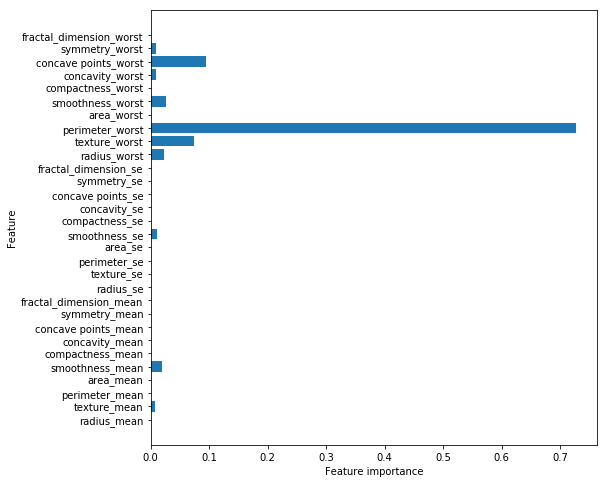

In [22]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

In [23]:
tree_pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

[[87  4]
 [ 6 46]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        91
           1       0.92      0.88      0.90        52

   micro avg       0.93      0.93      0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



In [24]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, tree_pred) * 100))

Testing Accuracy for Decision Tree Classifier: 93.01%


In [25]:
accuracy_score(y_test, tree_pred)

0.9300699300699301

In [26]:
tree_clf.score(X_test, y_test)

0.9300699300699301

In [27]:
y_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [28]:
tree_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [29]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [30]:
bagged_tree.score(X_test,y_test)

0.965034965034965

In [44]:
bagged_tree_pred = bagged_tree.predict(X_test)
print(confusion_matrix(y_test, bagged_tree_pred))
print(classification_report(y_test, bagged_tree_pred))

[[90  1]
 [ 4 48]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        91
           1       0.98      0.92      0.95        52

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [31]:
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
forest.score(X_train, y_train)

1.0

In [33]:
forest.score(X_test, y_test)

0.972027972027972

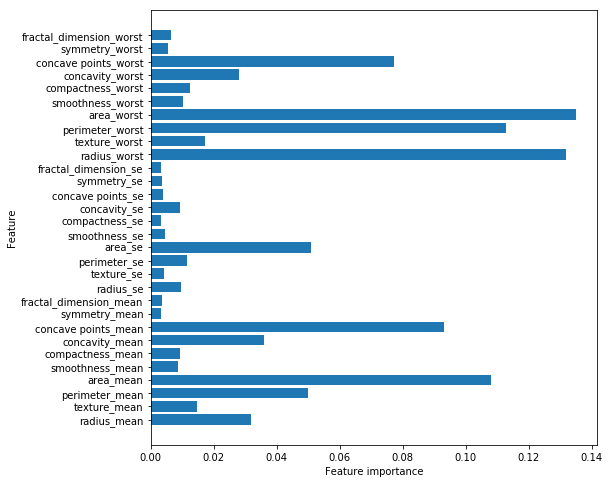

In [34]:
plot_feature_importances(forest)

In [45]:
forest_pred = forest.predict(X_test)
print(confusion_matrix(y_test, forest_pred))
print(classification_report(y_test, forest_pred))

[[91  0]
 [ 4 48]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        91
           1       1.00      0.92      0.96        52

   micro avg       0.97      0.97      0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [46]:
import xgboost as xgb
xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [47]:
xg_preds = xg_clf.predict(X_test)

In [48]:
print(accuracy_score(xg_preds, y_test))
print(confusion_matrix(y_test, xg_preds))
print(classification_report(y_test, xg_preds))

0.9790209790209791
[[91  0]
 [ 3 49]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        91
           1       1.00      0.94      0.97        52

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [49]:
grid_forest = RandomForestClassifier(criterion = 'gini', max_depth = None,min_samples_leaf=3, min_samples_split = 10, n_estimators=100)
grid_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
g_f_pred = grid_forest.predict(X_test)

In [51]:
print(accuracy_score(g_f_pred, y_test))
print(confusion_matrix(y_test, g_f_pred))
print(classification_report(y_test, g_f_pred))

0.965034965034965
[[91  0]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        91
           1       1.00      0.90      0.95        52

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



In [53]:
print(classification_report(y_test, g_f_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        91
           1       1.00      0.90      0.95        52

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



In [62]:
grid_boost = RandomForestClassifier(criterion = 'gini', max_depth = 10,min_samples_leaf=5, min_samples_split = 10, n_estimators=100)
grid_boost.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
xg_preds = grid_boost.predict(X_test)

In [64]:
print(accuracy_score(xg_preds, y_test))
print(confusion_matrix(y_test, xg_preds))
print(classification_report(y_test, xg_preds))

0.958041958041958
[[91  0]
 [ 6 46]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        91
           1       1.00      0.88      0.94        52

   micro avg       0.96      0.96      0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



In [35]:
df1 = pd.read_csv('epilipsy.csv')

In [36]:
df1.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [37]:
X= df1.drop(['Unnamed: 0', 'y'], axis=1)
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [38]:
y = df1['y']
y.head()

0    4
1    1
2    5
3    5
4    5
Name: y, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


C:\Users\xxtur\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xxtur\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
X

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

In [41]:
df.cov()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.563015e+16,3.287883e+07,5.364807e+07,2.222490e+08,4.262946e+09,-22802.053383,631.883924,499127.721282,214217.739286,-75792.615857,...,4.973106e+07,3.360214e+08,7.629681e+09,29510.163781,-58383.413342,605181.617857,289052.809853,-342061.639212,-67437.508622,NaN
radius_mean,3.287883e+07,1.241892e+01,4.907582e+00,8.544714e+01,1.224483e+03,0.008454,0.094197,0.190128,0.112475,0.014273,...,6.433100e+00,1.142886e+02,1.888227e+03,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450,NaN
texture_mean,5.364807e+07,4.907582e+00,1.849891e+01,3.443976e+01,4.859938e+02,-0.001415,0.053767,0.103692,0.048977,0.008419,...,2.411015e+01,5.174593e+01,8.412838e+02,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260,NaN
perimeter_mean,2.222490e+08,8.544714e+01,3.443976e+01,5.904405e+02,8.435772e+03,0.070836,0.714714,1.387234,0.802360,0.121922,...,4.525811e+01,7.923282e+02,1.302615e+04,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391,NaN
area_mean,4.262946e+09,1.224483e+03,4.859938e+02,8.435772e+03,1.238436e+05,0.876178,9.264931,19.244924,11.241958,1.459596,...,6.218249e+02,1.134179e+04,1.921926e+05,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756,NaN
smoothness_mean,-2.280205e+04,8.454460e-03,-1.414779e-03,7.083607e-02,8.761781e-01,0.000198,0.000490,0.000585,0.000302,0.000215,...,3.118110e-03,1.128795e-01,1.655299e+00,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127,NaN
compactness_mean,6.318839e+02,9.419706e-02,5.376681e-02,7.147141e-01,9.264931e+00,0.000490,0.002789,0.003718,0.001703,0.000873,...,8.054412e-02,1.047413e+00,1.532344e+01,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656,NaN
concavity_mean,4.991277e+05,1.901276e-01,1.036923e-01,1.387234e+00,1.924492e+01,0.000585,0.003718,0.006355,0.002850,0.001094,...,1.469342e-01,1.954350e+00,3.068241e+01,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741,NaN
concave points_mean,2.142177e+05,1.124751e-01,4.897693e-02,8.023604e-01,1.124196e+01,0.000302,0.001703,0.002850,0.001506,0.000492,...,6.981902e-02,1.116016e+00,1.788688e+01,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258,NaN
symmetry_mean,-7.579262e+04,1.427317e-02,8.418876e-03,1.219216e-01,1.459596e+00,0.000215,0.000873,0.001094,0.000492,0.000752,...,1.527421e-02,2.018958e-01,2.765725e+00,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non